In [1]:
import numpy as np

In [2]:
lam = 0.532
d = 4
D = 4000
z = 50000

In [3]:
ind_x = np.arange(1000)
ind_y = np.arange(1000)

xx, yy = np.meshgrid(ind_x, ind_y)

xx = xx * d
yy = yy * d

In [4]:
R = np.sqrt(xx**2+yy**2+z**2)

In [5]:
phi1 = np.pi * d * xx / (lam * R)
phi2 = np.pi * d * yy / (lam * R)

In [6]:
np.sin(phi1[999, 999])/phi1[999, 999]

0.5084806844797762

In [7]:
Propagate = (z / (R**2)) * (1/(2*np.pi*R) - 1/lam*1j) * (np.cos(2*np.pi*R/lam) + np.sin(2*np.pi*R/lam)*1j) * d**2

In [8]:
for i in range(1000):
    for j in range(1000):
        sinc1 = 1
        sinc2 = 1
        
        if phi1[i,j] != 0.0:
            sinc1 = np.sin(phi1[i,j])/phi1[i,j]
            
        if phi2[i,j] != 0.0:
            sinc2 = np.sin(phi2[i,j])/phi2[i,j]
            
        Propagate[i, j] *= sinc1 * sinc2

In [9]:
Propagate = np.hstack([np.flip(Propagate, axis=1)[:, :-1], Propagate])

In [10]:
Propagate = np.vstack([np.flip(Propagate)[:-1, :], Propagate])

In [11]:
U = np.empty((500, 500), np.complex128)

In [12]:
for col in range(500):
    for row in range(0, col+1):
        U[col, row] = np.sum(Propagate[999-col: 1999-col, 999-row: 1999-row])
        U[row, col] = U[col, row]

In [13]:
U = np.hstack([U, np.flip(U, axis = 1)])

In [14]:
U = np.vstack([U, np.flip(U)])

In [15]:
Intensity = np.real(U * np.conjugate(U))

In [18]:
plt.rcParams.update({'font.size': 16})

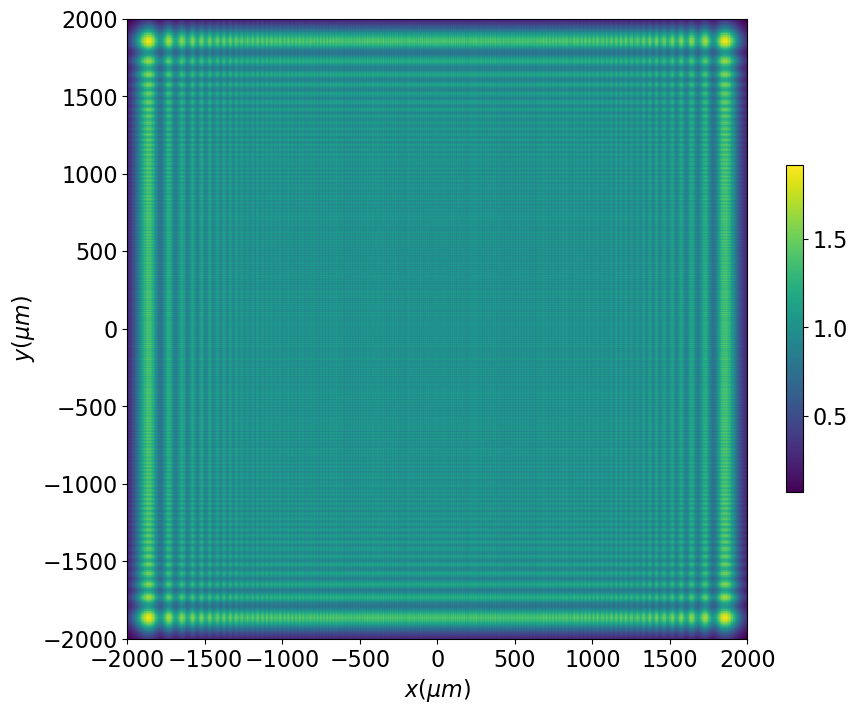

In [19]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 6), dpi=60)
fig, ax = plt.subplots(figsize=(10, 8.5))
#im = ax.imshow(Intensity)

x0 = np.linspace(-1998, 1998, 1000)
y0 = np.linspace(-1998, 1998, 1000)

ax.set_xlabel('$x(\mu m)$')
ax.set_ylabel('$y(\mu m)$')

ax.set_box_aspect(1)

pcm = ax.pcolor(x0, y0, Intensity)

cb = fig.colorbar(pcm, ax=ax, shrink=0.5)
cb.set_ticks(np.arange(0.5, 2, 0.5))

fig.savefig("en_plane_RZ.png")

plt.show()

## Посчитаем diffractio

In [19]:
from diffractio import sp, nm, plt, np, mm, degrees, um

In [20]:
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

C:\Users\user\anaconda3\Lib\site-packages\diffractio\scalar_fields_XY.py:2489: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\diffractio\scalar_fields_XY.py:2451: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


(<Figure size 480x360 with 2 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x1343bfa4dd0>)

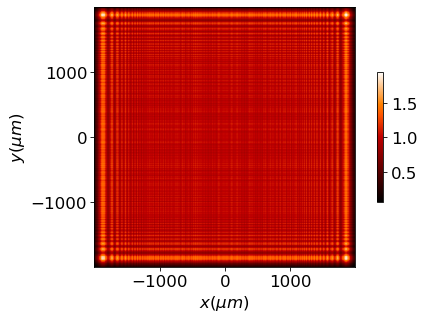

In [21]:
wavelength = 0.532 * um
x0 = np.linspace(-1998 * um, 1998 * um, 1000)
y0 = np.linspace(-1998 * um, 1998 * um, 1000)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info='t0')
t0.square(r0=(0, 0), size=4000 * um, angle=0 * degrees)

u1 = t0 * u0

u2 = u1.RS(z=50000 * um)

u2.draw(kind='intensity', has_colorbar='vertical', filename='diffractio')

## Постимаем среднюю разницу

In [24]:
errors = abs(U - u2.u) / abs(u2.u)

In [25]:
np.mean(errors)

0.005628097391630402